<a href="https://colab.research.google.com/github/sahay-46/AML/blob/main/Lab2_2348545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dataframe
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Program_2_Dataset.csv')
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
#dropping columns
data=data.drop(columns=['Crime_Rate','Zone_proportion','CHAS','NOX','AGE','RAD','PTRATIO','B','LSTAT'],axis=1)
data.head()

,Non_Retail_Acres,Avg_rooms,Distance,Property_TaxRate,MValue
0,2.89,7.416,3.4952,276,33.2
1,8.56,6.727,2.7778,384,27.5
2,8.56,6.781,2.8561,384,26.5
3,8.56,6.405,2.7147,384,18.6
4,8.56,6.137,2.7147,384,19.3


In [ ]:
#calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns='MValue',axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0  Non_Retail_Acres   9.598374
1        Avg_rooms   16.747965
2          Distance   6.880607
3  Property_TaxRate  13.861510


In [ ]:
#finding VIF post dropping of high VIF features
X=X.drop(columns=['Avg_rooms ','Property_TaxRate'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0  Non_Retail_Acres  1.468836
1          Distance  1.468836


In [ ]:
#final dataframe
data=data.drop(columns=['Avg_rooms ','Property_TaxRate'])
data.head()

,Non_Retail_Acres,Distance,MValue
0,2.89,3.4952,33.2
1,8.56,2.7778,27.5
2,8.56,2.8561,26.5
3,8.56,2.7147,18.6
4,8.56,2.7147,19.3


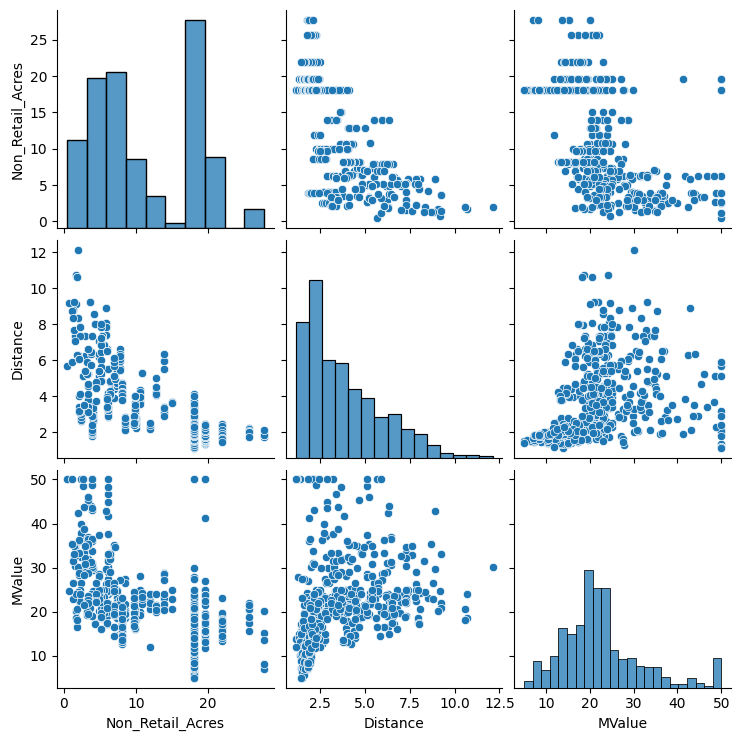

In [ ]:
#plotting relation among columns
import seaborn as sns
sns.pairplot(data)

In [ ]:
#Assigning X & Y for multi linear regression
x=data[['Non_Retail_Acres','Distance']]
y=data['MValue']

In [ ]:
#splitting data for training and testing in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33,random_state=2)

In [ ]:
#fitting linear model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#finding the intercept and coefficient
print('Intercept:',model.intercept_,'\nCoefficient:',model.coef_)

Intercept: 37.36337530531864 
Coefficient: [-0.90572254 -1.14955919]


In [ ]:
#finding the R2 score
model.score(X_test,Y_test)

0.21075885140593198